# Dataset
The dataset "healthcare-dataset-stroke-data.csv" is a public healthcare dataset. This comes under Binary Classification dataset. It contains Twelve attributes out of which evelven of them contains Clinical Features for predecting stroke events. 

# Dealing with Dataset
We will start with loading our dataset into this jupyter notebook. We will using Pandas or Numpy libraries to load and deal with our data. For Visulalizing the data we will be using Matplotlib.pyplot and seaborn. For creating predicting model we will be using Sci-Kit learn library.

In [3]:
# Load Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.inspection import permutation_importance
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import classification_report

In [4]:
#Load data 
df = pd.read_csv("healthcare-dataset-stroke-data.csv")
df.head(10) # Check first ten rows of the data 

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [5]:
df.tail(10) #Check last ten rows of the data 

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5100,68398,Male,82.0,1,0,Yes,Self-employed,Rural,71.97,28.3,never smoked,0
5101,36901,Female,45.0,0,0,Yes,Private,Urban,97.95,24.5,Unknown,0
5102,45010,Female,57.0,0,0,Yes,Private,Rural,77.93,21.7,never smoked,0
5103,22127,Female,18.0,0,0,No,Private,Urban,82.85,46.9,Unknown,0
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


On checking first and last ten rows of the data, the last column seed to be arranged in order or 1 and then 0 which can create bias in training in the machine learning model so we will shuffle the data to get the fair sample for analysis.

In [7]:
# Shuffle the index
df = df.sample(frac=1, random_state=1).reset_index(drop= True)

### Data Cleaning and Exploratory Data analysis
One of the critical step in machine learning is Data cleaning. There are many different statistical analysis and data visualization techniques in tabular data which you can use to explore the data in order to identify data cleaning operations you may want to perform.

EDA (Exploartory data analysis) is an informal analysis to get familar with your data or get to know your data, discovering potential hypothesis and identifying possible issues with the data.

Here we will start with the EDA, our objective will be to understand our dataset properly. We will check for the uniqueness of the data, null values in the data, duplicates and the description of the data.sults.

In [9]:
df.info() # Get basic information of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [10]:
df.shape # Get the number of row and columns in the data

(5110, 12)

In [11]:
df.nunique() # Get the number of unique values in the data

id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [12]:
df.isnull().sum() # Get number of null values in the columns

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [13]:
((df.isnull().sum()/df.shape[0])*100).astype("str") + " %"

id                                  0.0 %
gender                              0.0 %
age                                 0.0 %
hypertension                        0.0 %
heart_disease                       0.0 %
ever_married                        0.0 %
work_type                           0.0 %
Residence_type                      0.0 %
avg_glucose_level                   0.0 %
bmi                  3.9334637964774952 %
smoking_status                      0.0 %
stroke                              0.0 %
dtype: object

In [14]:
dups = df.duplicated()
print(dups.any()) # Check of duplicated values in the dataset

False


In [15]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


All of this EDA has been conducted for when it comes to the data cleaning first we will seperate the data into train and test. The Train data will solely be cleaned, to prevent the machine learning bias.

In [17]:
drop_df = df.columns[0] # Select the first column with attribute name "ID" 
df.drop(columns= drop_df, inplace = True) # Remove the column from the table
df.shape # Check shape

(5110, 11)

In [18]:
# First get the variables 
x = df.drop(columns=['stroke']) # Select the dependent variable
y = df['stroke'] # Select the independent variable

# Split the data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20, random_state=1) # Split 80% train and 20% test
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(4088, 10) (1022, 10)
(4088,) (1022,)


In [19]:
print(type(y_train), y_train.shape)
print(y_train[:10])          # sample values
print(y_train.dtype)  

<class 'pandas.core.series.Series'> (4088,)
4152    0
4051    0
5076    0
874     0
3534    0
3391    0
4730    0
749     0
1913    0
4104    0
Name: stroke, dtype: int64
int64


Now we will clean the training data starting with removing non unique, null and dpulicated values. Later we will clean the data with the Encoding and scaling the catogrical and numerical data.

In [21]:
# check the shape of the X_train 
x_train.shape

(4088, 10)

In [22]:
print(type(x_train))
print(type(x_test))
print(type(y_train))
print(type(y_test))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [23]:
x_train.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  171
smoking_status         0
dtype: int64

In [24]:
x_train.dropna(inplace= True)
x_train.shape
y_train = y_train.loc[x_train.index]

In [25]:
x_test.isnull().sum()

gender                0
age                   0
hypertension          0
heart_disease         0
ever_married          0
work_type             0
Residence_type        0
avg_glucose_level     0
bmi                  30
smoking_status        0
dtype: int64

In [26]:
x_test.dropna(inplace=True)
y_test = y_test.loc[x_test.index]

In [27]:
print(y_train.dtypes)
y_train.astype(int)

int64


4152    0
4051    0
5076    0
874     0
3534    0
       ..
2895    0
2763    0
905     0
3980    0
235     0
Name: stroke, Length: 3917, dtype: int32

In [28]:
encode = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
encode.fit(x_train[['gender','ever_married','work_type','Residence_type','smoking_status']])
x_train[['gender','ever_married','work_type','Residence_type','smoking_status']] =encode.transform(x_train[['gender','ever_married','work_type','Residence_type','smoking_status']])
x_test[['gender','ever_married','work_type','Residence_type','smoking_status']] =encode.transform(x_test[['gender','ever_married','work_type','Residence_type','smoking_status']])
x_train.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
4152,1.0,50.0,0,0,1.0,0.0,0.0,84.40,42.3,1.0
4051,1.0,29.0,0,0,1.0,0.0,1.0,102.40,26.9,3.0
5076,1.0,31.0,0,0,1.0,0.0,0.0,91.65,24.6,1.0
874,0.0,61.0,0,0,1.0,3.0,0.0,69.77,29.9,2.0
3534,0.0,33.0,0,0,0.0,2.0,1.0,83.16,20.2,0.0


In [29]:
# before smote
print(y_train.value_counts())

stroke
0    3760
1     157
Name: count, dtype: int64


In [30]:
smote = SMOTE(random_state=1)
x_train_, y_train = smote.fit_resample(x_train, y_train)
print(y_train.value_counts())

stroke
0    3760
1    3760
Name: count, dtype: int64


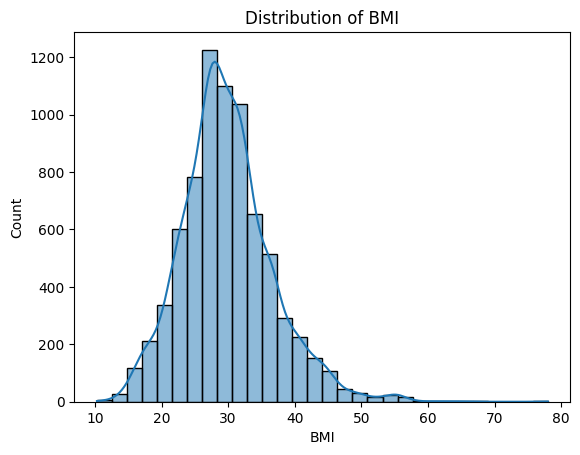

In [31]:
sns.histplot(x_train.iloc[:,8], kde=True, bins=30)
plt.title("Distribution of BMI")
plt.xlabel("BMI")
plt.ylabel("Count")
plt.show()

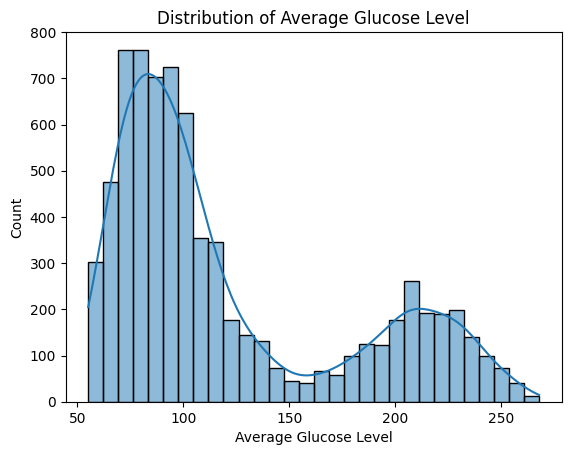

In [32]:
sns.histplot(x_train.iloc[:,7], kde=True, bins=30)
plt.title("Distribution of Average Glucose Level")
plt.xlabel("Average Glucose Level")
plt.ylabel("Count")
plt.show()

In [33]:
# Get mean and standard deviation of the attributes
x_mean_bmi, x_mean_avg = np.mean(x_train['bmi']), np.mean(x_train['avg_glucose_level'])
x_std_bmi, x_std_avg = np.std(x_train['bmi']), np.std(x_train['avg_glucose_level'])

# Print the Mean and standard deviation for both of the attributes
print (f"Mean and Standard deviation of BMI {x_mean_bmi:.3f}({x_std_bmi:.3f})")
print(f"Mean and Standard deviation of Average Glucose Level {x_mean_avg:.3f}({x_std_avg:.3f})")

# Create cut off 
cut_off_bmi = x_std_bmi * 3
cut_off_avg = x_std_avg * 3

# Get lower and Upper values
lower_bmi, upper_bmi = x_mean_bmi - cut_off_bmi , x_mean_bmi + cut_off_bmi
lower_avg, upper_avg = x_mean_avg - cut_off_avg , x_mean_avg + cut_off_avg

#Print
print(f"For BMi = Lower: {lower_bmi:.3f} Upper: {upper_bmi:.3f}")
print(f"For Average Glucose Level = Lower: {lower_avg:.3f} Upper: {upper_avg:.3f}")

Mean and Standard deviation of BMI 29.861(6.821)
Mean and Standard deviation of Average Glucose Level 121.221(56.267)
For BMi = Lower: 9.398 Upper: 50.324
For Average Glucose Level = Lower: -47.579 Upper: 290.022


In [34]:
outlier_bmi = [x for x in x_train['bmi'] if x < lower_bmi or  x > upper_bmi]
outlier_avg = [x for x in x_train['avg_glucose_level'] if x < lower_avg or x > upper_avg]
print(f"BMI: {len(outlier_bmi)}")
print(f"AVG: {len(outlier_avg)}")

BMI: 68
AVG: 0


In [35]:
x_train = x_train[(x_train['bmi'] >= lower_bmi) & (x_train['bmi'] <= upper_bmi)]
y_train = y_train.loc[x_train.index]

In [36]:
x_train = x_train[(x_train['avg_glucose_level'] >= lower_avg) & (x_train['avg_glucose_level'] <= upper_avg)]
y_train = y_train.loc[x_train.index]

In [37]:
scaler = StandardScaler()
cols_to_scale = ['age', 'avg_glucose_level', 'bmi']
x_train[cols_to_scale] = scaler.fit_transform(x_train[cols_to_scale].astype(float))
x_test[cols_to_scale] = scaler.transform(x_test[cols_to_scale].astype(float))
x_train.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1.0,-0.227369,0,0,1.0,0.0,0.0,-0.652176,1.981682,1.0
1,1.0,-1.175396,0,0,1.0,0.0,1.0,-0.331145,-0.426930,3.0
2,1.0,-1.085108,0,0,1.0,0.0,0.0,-0.522872,-0.786658,1.0
3,0.0,0.269217,0,0,1.0,3.0,0.0,-0.913103,0.042280,2.0
4,0.0,-0.994819,0,0,0.0,2.0,1.0,-0.674291,-1.474833,0.0


<Axes: >

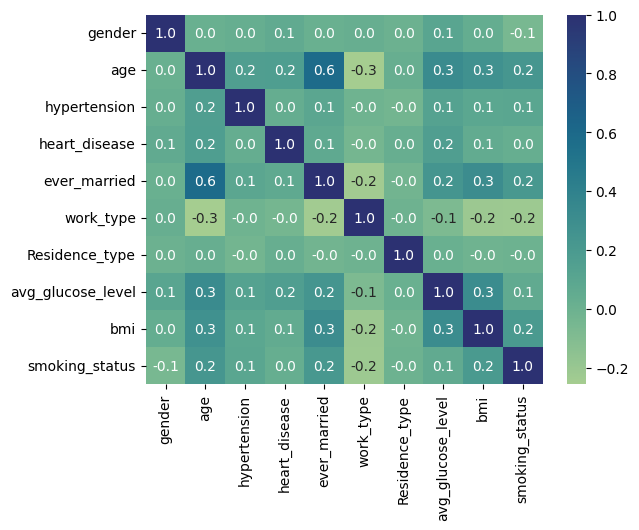

In [38]:
sns.heatmap(x_train.corr(), annot = True, fmt = '.1f', cmap= 'crest')

Features:0, Scores: 0.064
Features:1, Scores: 0.204
Features:2, Scores: 0.011
Features:3, Scores: 0.003
Features:4, Scores: 0.072
Features:5, Scores: 0.138
Features:6, Scores: 0.081
Features:7, Scores: 0.099
Features:8, Scores: 0.067
Features:9, Scores: 0.064


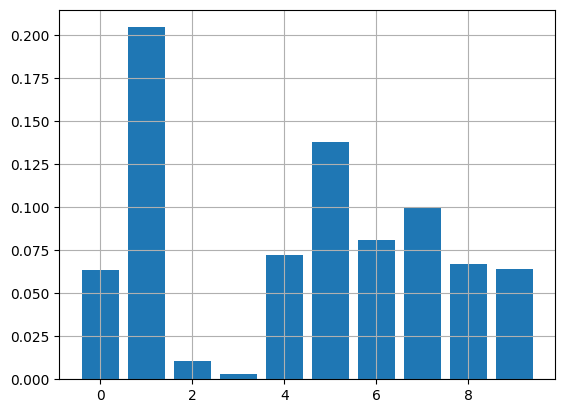

In [39]:
from sklearn.inspection import permutation_importance
modeldt = DecisionTreeClassifier()
modeldt.fit(x_train, y_train)
results = permutation_importance(modeldt, x_train, y_train, scoring='accuracy')
importance = results.importances_mean
for i,v in enumerate(importance):
    print(f"Features:{i}, Scores: {v:.3f}")

plt.bar([x for x in range(len(importance))], importance)
plt.grid(True)
plt.show()

i: 0.000 v: 0.160
i: 1.000 v: 1.964
i: 2.000 v: -0.951
i: 3.000 v: -1.236
i: 4.000 v: -0.581
i: 5.000 v: 0.031
i: 6.000 v: 0.055
i: 7.000 v: 0.374
i: 8.000 v: 0.190
i: 9.000 v: 0.305


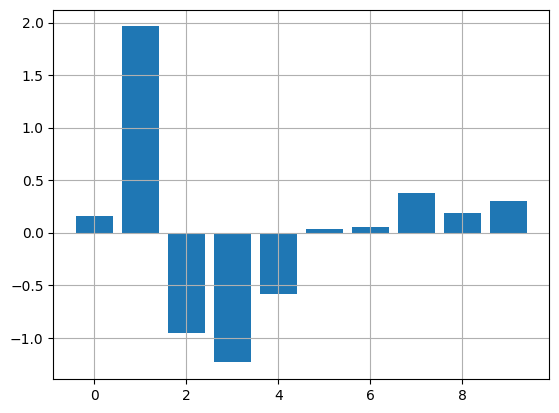

In [40]:
y_train = pd.Series(y_train.squeeze())
model_lor = LogisticRegression()
model_lor.fit(x_train,y_train)
imp_lor = model_lor.coef_[0]
for i, v in enumerate(imp_lor):
    print(f"i: {i:.3f} v: {v:.3f}")

plt.bar([x for x in range(len(imp_lor))], imp_lor)
plt.grid(True)
plt.show()

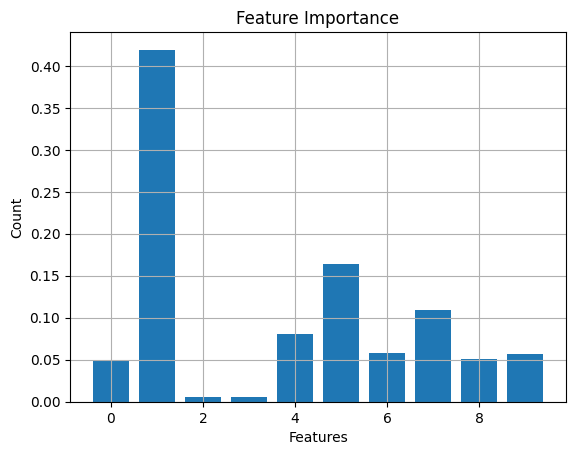

In [41]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
model_imp = model.feature_importances_

plt.bar([x for x in range(len(model_imp))], model_imp)
plt.grid(True)
plt.title("Feature Importance")
plt.xlabel("Features")
plt.ylabel("Count")
plt.show()

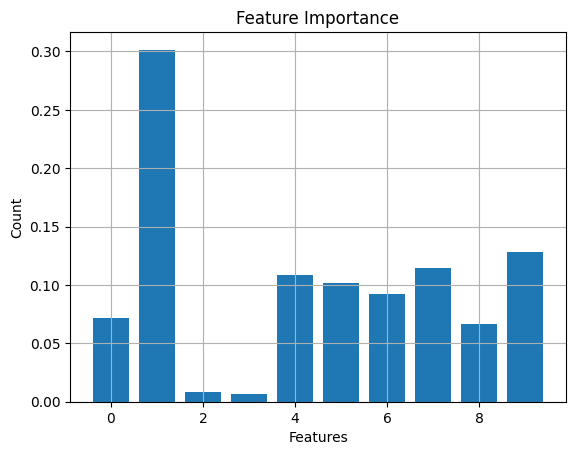

In [42]:
model_rf = RandomForestClassifier()
model_rf.fit(x_train, y_train)
mimp = model_rf.feature_importances_

plt.bar([x for x in range(len(mimp))], mimp)
plt.grid(True)
plt.title("Feature Importance")
plt.xlabel("Features")
plt.ylabel("Count")
plt.show()

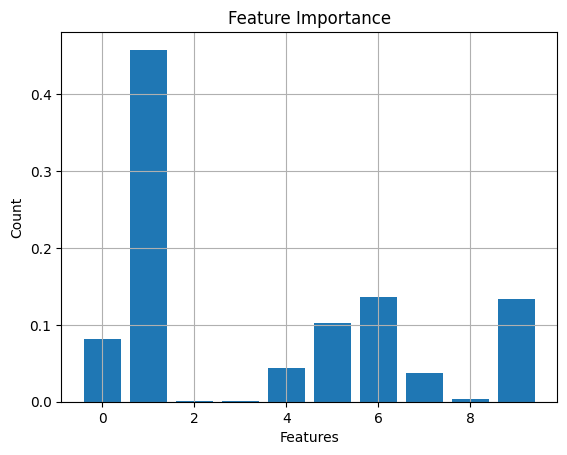

In [43]:
from sklearn.ensemble import GradientBoostingClassifier
model_gb = GradientBoostingClassifier()
model_gb.fit(x_train, y_train)
gbimp = model_gb.feature_importances_

plt.bar([x for x in range(len(gbimp))], gbimp)
plt.grid(True)
plt.title("Feature Importance")
plt.xlabel("Features")
plt.ylabel("Count")
plt.show()

In [44]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
y_test = y_test.squeeze()
y_train = y_train.squeeze()

(7452, 10)
(7452,)
(992, 10)
(992,)


In [45]:
print(type(x_test))
print(type(y_test))
print(type(x_train))
print(type(y_train))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [46]:
y_test = y_test.values
x_test = x_test.values
x_train = x_train.values
y_train = y_train.values

In [47]:
x_train = x_train.astype(int)
x_test =x_test.astype(int)
y_train =y_train.astype(int)
y_test = y_test.astype(int)

In [48]:
model_dtc = DecisionTreeClassifier(class_weight='balanced')
model_dtc.fit(x_train, y_train)
pred_dtc = model_dtc.predict(x_test)
accuracy_dtc = accuracy_score(y_test, pred_dtc)

model_rfc = RandomForestClassifier(class_weight='balanced')
model_rfc.fit(x_train, y_train)
pred_rfc = model_rfc.predict(x_test)
accuracy_rfc = accuracy_score(y_test, pred_rfc)


model_gbc = GradientBoostingClassifier()
model_gbc.fit(x_train, y_train, sample_weight=compute_sample_weight('balanced', y_train))
pred_gbc = model_gbc.predict(x_test)
accuracy_gbc = accuracy_score(y_test, pred_gbc)


model_lor = LogisticRegression(class_weight='balanced')
model_lor.fit(x_train, y_train)
pred_lor = model_lor.predict(x_test)
accuracy_lor = accuracy_score(y_test, pred_lor)


print(f"Decision Tree Classifier: {accuracy_dtc*100:.3f}")
print(f"Random Forest Classifier: {accuracy_rfc*100:.3f}")
print(f"Gradient Boosting Classifier: {accuracy_gbc*100:.3f}")
print(f"Logistic Regression: {accuracy_lor*100:.3f}")

Decision Tree Classifier: 84.476
Random Forest Classifier: 83.266
Gradient Boosting Classifier: 78.528
Logistic Regression: 76.210


In [49]:

selected_features1 = [1,7,8]
x_train_sel = x_train[:, selected_features1]
x_test_sel = x_test[:, selected_features1]

model_dtc_sel = DecisionTreeClassifier(class_weight= 'balanced')
model_dtc_sel.fit(x_train_sel, y_train)
pred_dtc_sel = model_dtc_sel.predict(x_test_sel)
accuracy_dtc_sel = accuracy_score(y_test, pred_dtc)

model_rfc_sel = RandomForestClassifier(class_weight='balanced')
model_rfc_sel.fit(x_train_sel, y_train)
pred_rfc_sel = model_rfc_sel.predict(x_test_sel)
accuracy_rfc_sel = accuracy_score(y_test, pred_rfc)


model_gbc_sel = GradientBoostingClassifier()
model_gbc_sel.fit(x_train_sel, y_train,sample_weight=compute_sample_weight('balanced', y_train))
pred_gbc_sel = model_gbc_sel.predict(x_test_sel)
accuracy_gbc_sel = accuracy_score(y_test, pred_gbc)


model_lor_sel = LogisticRegression(class_weight='balanced')
model_lor_sel.fit(x_train_sel, y_train)
pred_lor_sel = model_lor_sel.predict(x_test_sel)
accuracy_lor_sel = accuracy_score(y_test, pred_lor)


print(f"Decision Tree Classifier: {accuracy_dtc_sel*100:.3f}")
print(f"Random Forest Classifier: {accuracy_rfc_sel*100:.3f}")
print(f"Gradient Boosting Classifier: {accuracy_gbc_sel*100:.3f}")
print(f"Logistic Regression: {accuracy_lor_sel*100:.3f}")

Decision Tree Classifier: 84.476
Random Forest Classifier: 83.266
Gradient Boosting Classifier: 78.528
Logistic Regression: 76.210


In [50]:
model_lor.classes_

array([0, 1])

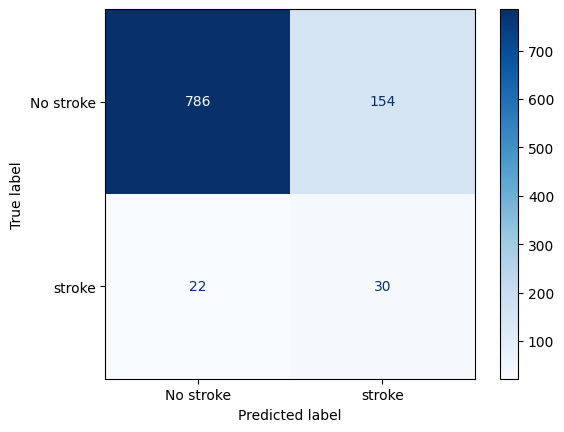

In [51]:
cm= confusion_matrix(y_test, pred_lor_sel, labels= model_lor_sel.classes_)
cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = ['No stroke', 'stroke'])
cm_disp.plot(cmap='Blues')

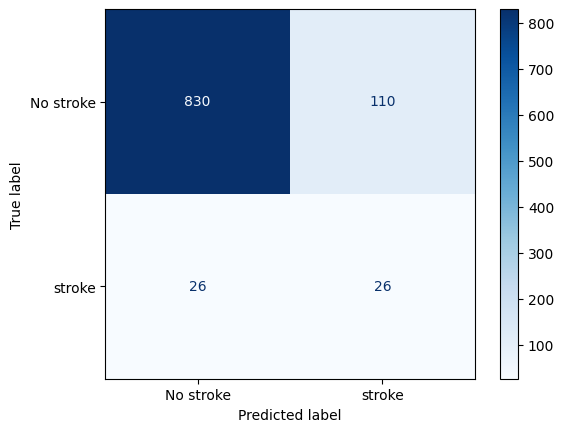

In [52]:
cm= confusion_matrix(y_test, pred_dtc_sel,labels=[0, 1])
cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = ['No stroke', 'stroke'])
cm_disp.plot(cmap='Blues')

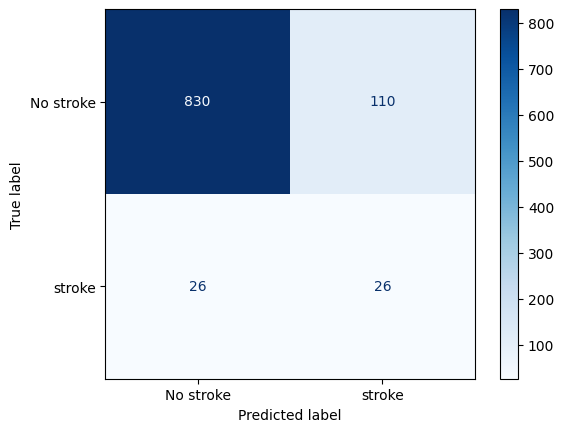

In [53]:
cm= confusion_matrix(y_test, pred_rfc_sel,labels=[0, 1])
cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = ['No stroke', 'stroke'])
cm_disp.plot(cmap='Blues')

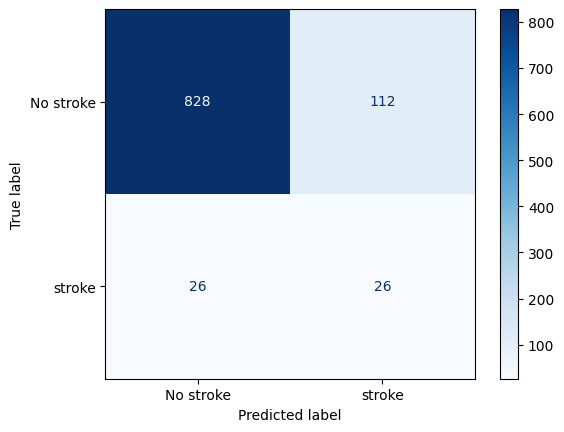

In [54]:
cm= confusion_matrix(y_test, pred_gbc_sel,labels=[0, 1])
cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = ['No stroke', 'stroke'])
cm_disp.plot(cmap='Blues')

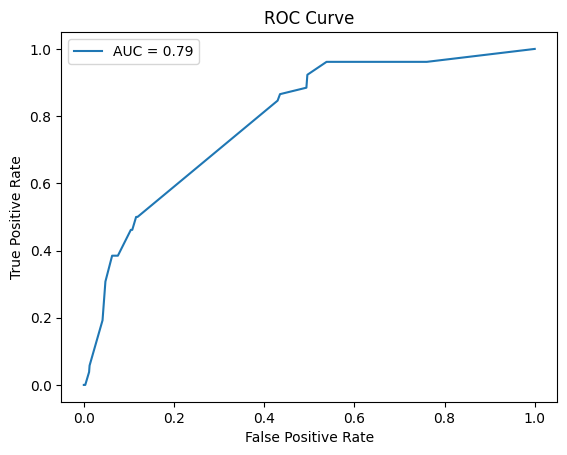

In [55]:
y_score = model_dtc_sel.predict_proba(x_test_sel)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


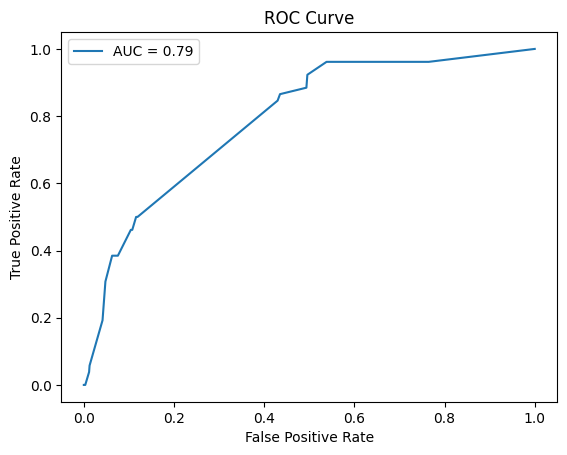

In [56]:
y_score = model_rfc_sel.predict_proba(x_test_sel)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


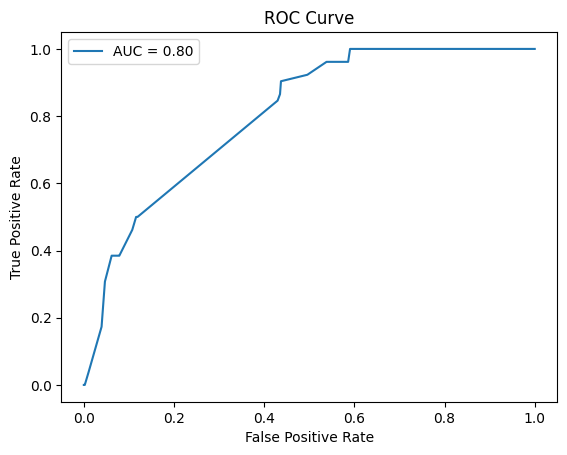

In [57]:
y_score = model_gbc_sel.predict_proba(x_test_sel)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


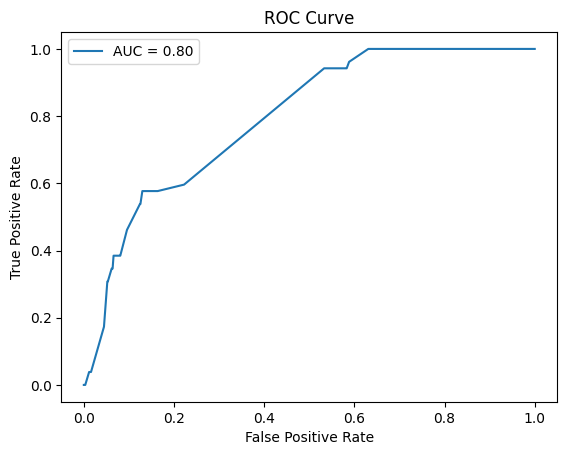

In [58]:
y_score = model_lor_sel.predict_proba(x_test_sel)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


In [59]:
precision = precision_score(y_test, pred_dtc_sel)
recall = recall_score(y_test, pred_dtc_sel)
f1 = f1_score(y_test,pred_dtc_sel)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.19117647058823528
Recall: 0.5
F1 Score: 0.2765957446808511


In [60]:
cr = classification_report(y_test, pred_dtc_sel)
print(cr)

              precision    recall  f1-score   support

           0       0.97      0.88      0.92       940
           1       0.19      0.50      0.28        52

    accuracy                           0.86       992
   macro avg       0.58      0.69      0.60       992
weighted avg       0.93      0.86      0.89       992



In [61]:
cr = classification_report(y_test, pred_lor_sel)
print(cr)

              precision    recall  f1-score   support

           0       0.97      0.84      0.90       940
           1       0.16      0.58      0.25        52

    accuracy                           0.82       992
   macro avg       0.57      0.71      0.58       992
weighted avg       0.93      0.82      0.87       992



In [62]:
cr = classification_report(y_test, pred_rfc_sel)
print(cr)

              precision    recall  f1-score   support

           0       0.97      0.88      0.92       940
           1       0.19      0.50      0.28        52

    accuracy                           0.86       992
   macro avg       0.58      0.69      0.60       992
weighted avg       0.93      0.86      0.89       992



In [63]:
cr = classification_report(y_test, pred_gbc_sel)
print(cr)

              precision    recall  f1-score   support

           0       0.97      0.88      0.92       940
           1       0.19      0.50      0.27        52

    accuracy                           0.86       992
   macro avg       0.58      0.69      0.60       992
weighted avg       0.93      0.86      0.89       992

